<h1>Matplotlib - osa 1</h1>
<h2>Yksinkertainen pylväskaavio</h2>

Tämän jupyter-notebookin tueksi kannattaa lukea myös artikkeli https://tilastoapu.wordpress.com/2019/07/02/kuviot-ja-kaaviot-pythonilla/

<b>Matplotlib</b> on Pythonille tarkoitettu ohjelmakirjasto grafiikan tekemiseen.

Keskityn seuraavassa grafiikan tekoon <b>pandas dataframesta</b>, joten tuon <b>pandas</b>-kirjaston <b>pd</b>-nimisenä.

Matplotlib-grafiikkaa varten tuon <b>matplotlib.pyplot</b>-kirjaston <b>plt</b>-nimisenä.

Jupyter notebook tulostaa automaattisti grafiikan notebookiin, jos lisään notebookin alkuun komennon <b>%matplotlib inline</b>.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Avaan datan
df = pd.read_excel('http://taanila.fi/data1.xlsx')

# Näytän datan viisi ensimmäistä riviä
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [3]:
# Lasken eri koulutuksen suorittaneiden lukumäärät
df1 = pd.crosstab(df['koulutus'], 'Lkm')

# koulutus-muuttujan numeroarvoja vastaavat tekstimuotoiset arvot listana
koulutus = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']

# Lisään koulutus-muuttujan tekstimuotoiset arvot dataframen indeksiin
df1.index = koulutus

# Näytän dataframen
df1

col_0,Lkm
Peruskoulu,27
2. aste,30
Korkeakoulu,22
Ylempi korkeakoulu,2


<h2>Vaakapylväskaavion luonti</h2>

Teen äsken luomastani dataframesta <b>df1</b> vaakapylväskaavion <b>plot</b>-toiminnolla. Plot-toiminnolla voin luoda eri kaaviolajeja, esimerkiksi pystypylväskaavion <b>bar</b> tai vaakapylväskaavion <b>barh</b>. Samaan lopputulemaan pääsisin myös komennolla <b>df1.plot(kind = 'barh')</b>.

Sijoitan kaavion jatkomuokkausta varten muuttujaan. Tässä annan muuttujan nimeksi <b>ax1</b>.

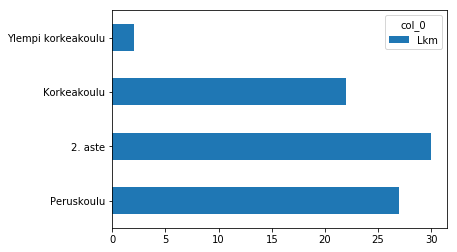

In [4]:
ax1 = df1.plot.barh()

<h2>Kaavion tekstit</h2>


Mielestäni yhden arvosarjan kaavioissa selite on tarpeeton, joten piilotan sen <b>legend</b>-lisäparametrilla.

Kaavion otsikoksi annan 'Koulutusjakauma' <b>set_title()</b>-toiminnolla.

Arvoakselin (x-akseli) otsikoksi annan 'Lukumäärä' <b>set_xlabel()</b>-toiminnolla. 

Jos en olisi lisännyt koulutusten tekstimuotoisia arvoja dataframen df1 indeksiin, niin voisin lisätä ne kaavioon toiminnolla <b>ax1.set_yticklabels(koulutus)</b>.

Text(0.5, 0, 'Lukumäärä')

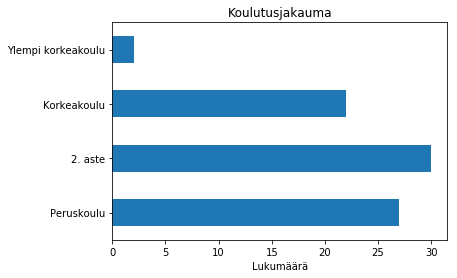

In [5]:
ax2 = df1.plot.barh(legend = False)

ax2.set_title('Koulutusjakauma')
ax2.set_xlabel('Lukumäärä')

<h2>Hienosäätöä</h2>

Lisään x-akselin jakoviivojen mukaisen taustaviivoituksen <b>grid()</b>-toiminnolla. Taustaviivoitus menee oletuksena pylväiden päälle, mutta asia korjaantuu <b>set_axisbelow()</b>-toiminnolla.

Häivytän luokka-akselin jakoviivat <b>tick_params()</b>-toiminnolla.

Viimeiseksi kikkailen pylväiden pituuksia vastaavat lukumäärät pylväiden viereen. Käytän tähän <b>text()</b>-toimintoa, jolla voin lisätä kaavioon tekstejä:

<ul>
<li>Käytän apuna Pythonin <b>for</b>-silmukkaa, jolla käyn läpi kaavion pylväät (<b>patches</b>-kokoelma) yksi kerrallaan.</li> 
<li>Vaakasuuntaisen pylvään pituuden saan <b>get_width()</b>-toiminnolla.</li>
<li>Vaakasuuntaisen pylvään alareunan sijainnin saan <b>get_y()</b>-toiminnolla.</li>
<li>Pylvään alareunan sijaintiin lisään puolet pylvään paksuudesta (<b>get_height()</b>).</li>
    <li>Pylvään viereen lisättävän lukumäärän, jonka sijoitan <b>label</b>-nimiseen muuttujaan, muotoilen desimaalittomaksi.</li>
    <li>Lisättävän merkkijonon sijainti määrittyy <b>x</b>:n ja <b>y</b>:n mukaan.</li> 
<li>Lisäparametri <b>s</b> tarkoittaa lisättävää merkkijonoa, joka tässä tapauksessa sisältää välilyönnin ja pylvään pituutta kuvaavan lukumäärän.</li>
<li><b>va</b> tarkoittaa pystysuuntaista tasausta (vertical alignment).</li>
</ul>

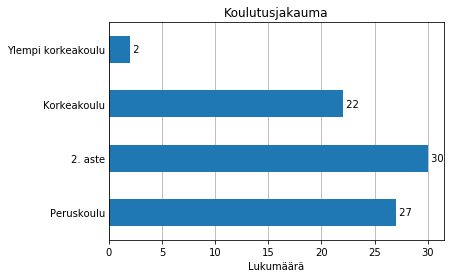

In [6]:
ax3 = df1.plot.barh(legend = False)

ax3.set_title('Koulutusjakauma')
ax3.set_xlabel('Lukumäärä')

ax3.grid(axis = 'x')
ax3.set_axisbelow(True)
ax3.tick_params(axis = 'y', length = 0)

for bar in ax3.patches:
    x = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    label = '{:.0f}'.format(x)
    ax3.text(x = x, y = y, s = ' ' + label, va = 'center')

<h2>Pystypylväskaavio</h2>

Pienin muutoksin voin toteuttaa edellisen pystypylväskaaviona.

<ul>
    <li>Huomaa luokka-akselin otsikoiden 45 asteen kääntö (<b>rotation</b>).</li>
<li>Huomaa pylvään pituuksia vastaavien lukuarvojen siirto hieman ylöspäin (<b>y = y + 0.3</b>), koska muuten lukuarvot olisivat pylväissä kiinni.</li>

<li><b>ha</b> tarkoittaa vaakasuuntaista tasausta (horizontal alignment).</li>
<li>Huomaa, että yläreunaan on lisätty hieman tilaa skaalamalla arvoakseli (<b>ax3.set_ylim(0, 35)</b>).</li>
</ul>

(0, 35)

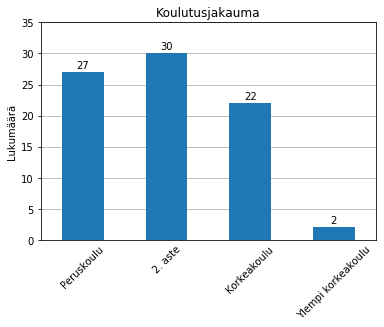

In [7]:
ax4 = df1.plot.bar(legend = False)

ax4.set_title('Koulutusjakauma')
ax4.set_ylabel('Lukumäärä')
ax4.set_xticklabels(koulutus, rotation = 45)

ax4.grid(axis = 'y')
ax4.set_axisbelow(True)
ax4.tick_params(axis = 'x', length = 0)

for bar in ax4.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    label = '{:.0f}'.format(y)
    ax4.text(x = x, y = y + 0.3, s = label, va = 'bottom', ha = 'center')
ax4.set_ylim(0, 35)

<h2>Prosenttien esittäminen</h2>

Arvoakselin prosenttilukujen muotoilulause ei ole ihan helpon näköinen:
<b>ax5.set_xticklabels(['{:.0f} %'.format(x) for x in ax5.get_xticks()])</b>
<ul>
    <li>Muotoilulauseke <b>'{:0f} %'</b> määrittää desimaalittoman prosenttimuotoilun, jolla muotoillaan kaikki x:t.</li>
    <li>x:t haetaan for-silmukalla yksi kerrallaan kaavion xtickseistä <b>get_xticks()</b>-toiminnolla.</li>
    <li>Huomaa, että kaikki ovat hakasulkujen [] sisällä (lista xticksejä!).</li>
</ul>

In [8]:
# Luon dataframen, jossa prosentit
df2 = pd.crosstab(df['koulutus'], 'Lkm')
df2['%'] = df2['Lkm'] / df2['Lkm'].sum() * 100
df2.index = koulutus
df2

col_0,Lkm,%
Peruskoulu,27,33.333333
2. aste,30,37.037037
Korkeakoulu,22,27.160494
Ylempi korkeakoulu,2,2.469136


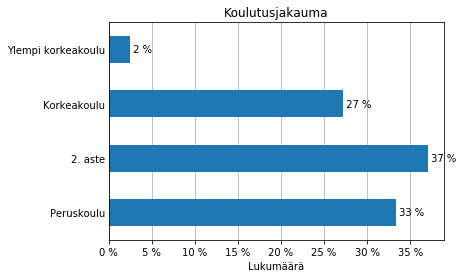

In [9]:
ax5 = df2['%'].plot.barh()

ax5.set_title('Koulutusjakauma')
ax5.set_xlabel('Lukumäärä')

ax5.grid(axis = 'x')
ax5.set_axisbelow(True)
ax5.tick_params(axis = 'y', length = 0)

ax5.set_xticklabels(['{:.0f} %'.format(x) for x in ax5.get_xticks()])

for bar in ax5.patches:
    x = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    label = '{:.0f} %'.format(x)
    ax5.text(x = x, y = y, s = ' ' + label, va = 'center')

<h2>Kaavion tallennus</h2>

Kun tallennan kaavion <b>savefig</b>-toiminnolla, niin tarkkaan ottaen tallennan kuvion (<b>figure</b>), jonka sisällä kaavio on. Kuvioon pääsen käsiksi <b>plt.gcf()</b>-toiminnolla (get current figure).

Ilman lisäparametria <b>bbox_inches = 'tight'</b> osia kaavion reunoilta voi jäädä tallentumatta.

Tallennusmuoto määräytyy  tiedostonimen tarkentimen (esim. png) perusteella. Mahdolliset tallennusmuodot selviävät komennolla <b>plt.gcf().canvas.get_supported_filetypes()</b>

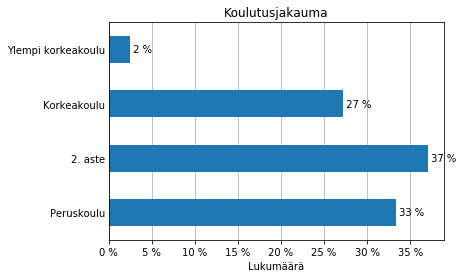

In [10]:
ax6 = df2['%'].plot.barh()

ax6.set_title('Koulutusjakauma')
ax6.set_xlabel('Lukumäärä')

ax6.grid(axis = 'x')
ax6.set_axisbelow(True)
ax6.tick_params(axis = 'y', length = 0)

ax6.set_xticklabels(['{:.0f} %'.format(x) for x in ax6.get_xticks()])

for bar in ax6.patches:
    x = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    label = '{:.0f} %'.format(x)
    ax6.text(x = x, y = y, s = ' ' + label, va = 'center')

# Tallennus
plt.gcf().savefig('testi1.png', bbox_inches = 'tight')

<h2>Lisätietoa</h2>

<b>plot</b>-toiminnon yhteydessä voin antaa monia lisäparametreja (edellä hyödynsin <b>legend</b>-lisäparametria):
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

Tekstiolioiden yhteydessä voin käyttää lukuisia tekstille ominaisia lisäparametreja:
https://matplotlib.org/api/text_api.html#matplotlib.text.Text

Edellä käytetyillä toiminnoilla on lukuisia lisäparametreja, jotka löydät helposti googlaamalla. Googlaamalla esimerkiksi <b>matplotlib pyplot tick_params</b> löydät helposti <b>tick_params()</b>-toiminnon kuvauksen ja lisäparametrit.

Matplotlib - osa 2 käsittelee useamman arvosarjan pylväskaavioita:
https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib2.ipynb